<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Why-Parallel-Computing?" data-toc-modified-id="Why-Parallel-Computing?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Why Parallel Computing?</a></span><ul class="toc-item"><li><span><a href="#Why-we-need-ever-increasing-performance" data-toc-modified-id="Why-we-need-ever-increasing-performance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Why we need ever-increasing performance</a></span></li><li><span><a href="#Why-we-are-building-parallel-systems" data-toc-modified-id="Why-we-are-building-parallel-systems-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why we are building parallel systems</a></span></li><li><span><a href="#Why-we-need-to-write-parallel-programs" data-toc-modified-id="Why-we-need-to-write-parallel-programs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Why we need to write parallel programs</a></span></li><li><span><a href="#How-do-we-write-parallel-programs" data-toc-modified-id="How-do-we-write-parallel-programs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How do we write parallel programs</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# Why Parallel Computing?

<!-- PELICAN_BEGIN_SUMMARY -->

For many years we’ve enjoyed the fruits of ever faster processors. However, because
of  physical  limitations  the  rate  of  performance  improvement  in  conventional  processors  is  decreasing.  In  order to  increase  the  power  of  processors,  chipmakers have turned to
multicore integrated circuits, that is, integrated circuits with multiple
conventional processors on a single chip.

<img src="https://i.imgur.com/rLbJhqZ.png"></img>

(Source: [Exponential growth of supercomputing power as recorded by the TOP500 list](https://www.top500.org/statistics/perfdevel/))
<!-- PELICAN_END_SUMMARY -->

From 1986 to 2002 the performance of microprocessors increased, on average, $50\%$ per year [[1]](#References). Since 2002, however, single processor performance improvement has slowed to about $20\%$ per year. This difference is dramatic: at $50%$ per year, performance will increase by almost a factor of **60** in 10 years, while at $20\%$, it will only increased by about a factor of **6**.

By 2005, most of the major manufacturers of microprocessors had decided that the road to rapidly increasing performance lay in the **direction of parallelism**. Rather than trying to continue to develop **ever-faster monolithic** processors, manufacturers started putting *multiple complete processors* on a single integrated circuit.

**All of this raises a number of questions:**

- Why do we care? Aren't single processor systems fast enough? After all, $20\%$ per year is still a pretty significant performance improvement.

- Why can't microprocessor manufacturers continue to develop much faster single processor systems? Why build **parallel systems**? Why build systems with multiple processors?

- Why can't we write programs that will automatically convert serial programs into **parallel programs**, that is, programs that take advantage of the presence of multiple processors?


Let's take a brief look at each of these questions.

## Why we need ever-increasing performance

The vast increases in computational power that we have been enjoying for decades now have been at the heart of many of the most dramatic advances in fields as diverse as science, the Internet, and entertainment. The following are a few examples:

- **Climate modeling**: In order to better understand climate change, we need far more accurate computer models, models that include interactions between the atmosphere, the oceans, solid land, the ice caps at the poles. We also need to be able to make detailed studies of how various interventions might affect the global climate.

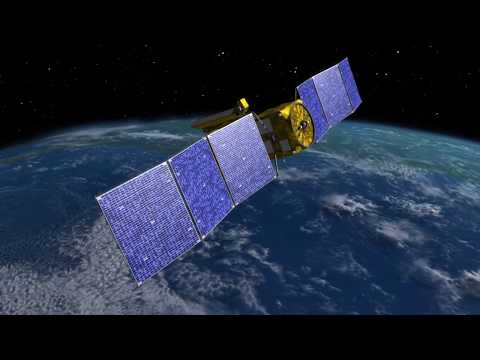

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("aLdNDFuLazw")

- **Protein folding**: It's believed that misfolded proteins may be involved in diseases such as [Huntington's disease](https://en.wikipedia.org/wiki/Huntington%27s_disease), [Parkinson's disease](https://en.wikipedia.org/wiki/Parkinson%27s_disease), [Alzheimer's disease](https://en.wikipedia.org/wiki/Alzheimer%27s_disease), but our ability to study configurations of complex molecules such as proteins is severely limited by our current computational power.

- **Drug discovery**: There are many ways in which increased computational power can be used in research into new medical treatments. For example, there are many drugs that are affective in treating a relatively small fraction of those suffering from some disease. It's possible that we can devise alternative treatments by careful analysis of the genomes of the individuals for whom the known treatment is ineffective. This, however, will involve extensive computational analysis of genomes.


Although the video below sheds light on how supercomputers are unraveling the mystery of the human brain by delivering the most exquisitely detailed human brain models ever created, It is a wonderful example of how ever-increasing performance is a game changer. What if instead of behavioral research, scientists could use the models to study cognition, simulate and study disease, and learn from the ways of the brain—everything from how it uses energy to how memory, representation and even consciousness itself are constructed?

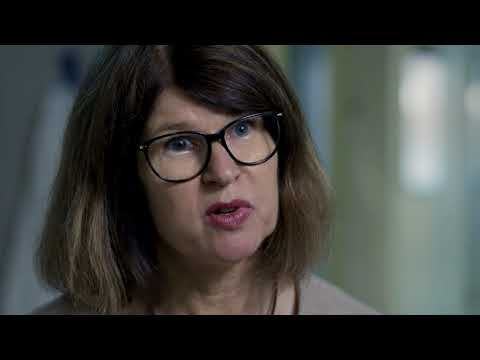

In [2]:
YouTubeVideo("pGI_GTnSs_E")

- **Data Analysis**: We generate tremendous amounts of data. By some estimates, the quantity of data stored worldwide doubles every two years [[2]](#References), but the vast majority of it is largely useless unless it is analyzed. For instance, knowing the sequence of nucleotides in human DNA is, by itself, of little use. Understanding how this sequence affects development and how it can cause disease requires extensive analysis. In addition to genomics, vast quantities of data are generated by **particle colliders** such as the [Large Hadron Collider](https://home.cern/topics/large-hadron-collider) at CERN, **medical imaging**, **astronomical research**, and **Web search engines**, etc..


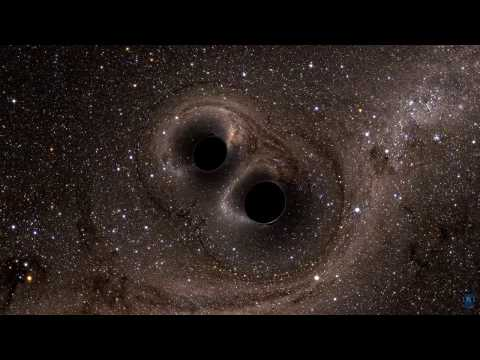

In [3]:
YouTubeVideo("bHK9RbM3HDk")

<font color='red'>These and a host of other problems won't be solved without vast increases in computational power.</font> 

## Why we are building parallel systems

Much of the tremendous increase in single processor performance has been driven by the ever-increasing density of transistors-the electronic switches-on integrated circuits. As the size of transistors decreases, their speed can be increased, and the overall speed of the integrated circuit can be increased. However, **as the speed of transistors increases, their power consumption also increases**. Most of this power is dissipated as heat, and when an integrated circuit gets too hot, it becomes unreliable. Therefore, it is becoming impossible to continue to increase the speed of integrated circuits. However, the increase in transistor density **can continue** at least for while. 

How then, can we exploit the continuing increase in transistor density? The answer is <font color='red'>parallelism</font>. Rather than building ever-faster, more complex, monolithic processors, the industry has decided to put multiple, relatively simple, complete processors on a single chip. Such integrated circuits are called **multicore** processors, and **core** has become synonymous with central processing unit, or CPU. 

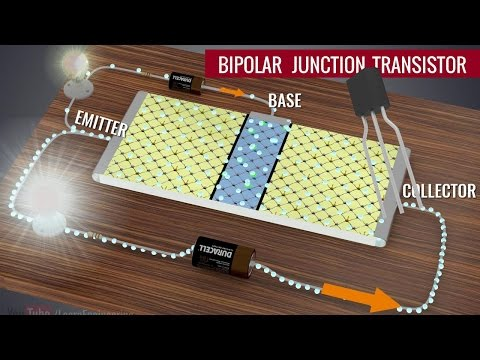

In [4]:
YouTubeVideo("7ukDKVHnac4")

## Why we need to write parallel programs

Most programs that have been written for conventional; single-core systems cannot exploit the presence of multiple cores. We can run multiple instances of a program on a multicore system, but this is often of little help. For instance, being able to run multiple instances of our favorite game program is not really what we want - we want the program to run faster with more realistic graphics.

In order to do this, we need to either rewrite our serial programs so that they are **parallel**, so that they can make use of multiple cores, or write translation programs, that is, programs that will automatically convert serial programs into parallel programs. <font color='red'>The bad news is that researchers have had very limited success writing programs that convert serial programs in languages such as C and C++ into parallel programs.</font>

An efficient parallel implementation of a serial program may not be obtained by finding efficient parallelizations of each of its steps. Rather, the best parallelization may be obtained by stepping back and devising and entirely new algorithm.

As an example, suppose we need to compute $n$ values and add them together. This can be done with the following serial code:

```python
total_sum = 0.
for i in range(0, n):
    x = compute_next_value(...)
    total_sum += x
```

Now suppose we also have $p$ cores and $p$ is much smaller than $n$. Then each core can form a partial sum of approximately $\frac{n}{p}$ values:

```python
my_sum = 0.
my_first = ...
my_last_i = ...
for my_i in range(my_first, my_last_i):
    my_x = compute_next_value(...)
    my_sum += my_x
```

Here the prefix **my__** indicates that each core is using its own, private variables, and each core can execute this block of code independently of the other cores.

After each core completes execution of this code, its variable **my_sum** will store the sum of the values computed by its calls to ```compute_next_value()```.
For instance, if there are **eight** cores, $n=24$, and the $24$ calls to ```compute_next_value()``` return the values

$$1, 4, 3, \ 9, 2, 8, \ 5, 1, 1, \ 6, 2, 7, \ 2, 5, 0, \ 4, 1, 8, \ 6, 5, 1, \ 2, 3, 9,$$

then the values store in ```my_sum``` might be
![my_sum](https://i.imgur.com/XzpU0f6.png)

(Source: [An Introduction to Parallel Programming by Peter Pacheco](https://www.cs.usfca.edu/~peter/ipp/))

Here we're assuming the cores are identified by nonnegative integers in the range $0,1,\dots, p-1$, where $p$ is the number of cores.

When the cores are done computing their values of ```my_sum```, they can form a global sum by sending their results to a designated **master** core, which can add their results.

```python
if ('I am the master core'):
    total_sum = my_x
    for each core other than myself:
        receive value from core
        total_sum += value
else:
    send my_x to the master core
```

In our example, if the master core is core $0$, it would add the values $8+19+7+15+7+13+12+14=95$.

A better way to do this--especially if the number of cores is large is instead of making the master core do all the work of computing the final sum, we can pair the cores so that while core $0$ adds in the result of core $1$, core $2$ can add in the result of core $3$ and so on. Then we can repeat the process with only the even-ranked cores: $0$ adds in the result of $2$, $4$ adds in the result of $6$, and so on. Now cores divisible by $4$ repeat the process, and so on.

![global_sum](https://i.imgur.com/W029foG.png)
(Source: [An Introduction to Parallel Programming by Peter Pacheco](https://www.cs.usfca.edu/~peter/ipp/))

This method results in an improvement of more than a factor of two. The difference becomes much more dramatic with large numbers of cores. With 1000 cores, the first method will require **$999$** receives and adds, while the second will only require $10$, an improvement of almost a factor of $100$!

We might expect that software could be written so that a large number of common serial constructs could be recognized and efficiently **parallelized**, that is, modified so that they can use multiple cores. However, as we apply this principle to ever more complex serial programs, it becomes more and more difficult to recognize the construct, and it becomes less and less likely that we'll have a precoded, efficient parallelization.

<font color='red'>Thus, we cannot simply continue to write serial programs, we must write parallel programs, programs that exploit the power of multiple processors.</font>


## How do we write parallel programs

There are a number of possible answers to this question, but most of them depend on the basic idea of **partitioning** the work to be done among the cores. There are two widely used approaches:

- [**Task-parallelism**](https://en.wikipedia.org/wiki/Task_parallelism): is the simultaneous execution on multiple cores of many different functions across the same or different datasets.
- [**Data-parallelism (aka SIMD)**](https://en.wikipedia.org/wiki/Data_parallelism): is the simultaneous execution on multiple cores of the same function across the elements of a dataset.

The first part of global sum example [above](#Why-we-need-to-write-parallel-programs) would probably be considered and example of **data parallelism**. The data are the values computed by ```compute_next_value()```, and each core carries out roughly the same operations on its assigned elements. 

The second part of this global sum example might be considered an example of **task parallelism**. There are two tasks: **receiving**, and **adding** the cores' partial sums, which is carried out by the master core, and giving the partial sum to the master core, which is carried out by the other cores.

In both global sum examples, the coordination involves **communication**: one or more cores send their current partial sums to another one. The global sum examples should also involve coordination through **load balancing**: even though we didn't give explicit formulas, it is clear that we want the cores all to be assigned roughly the same number of values to compute. If, for example, one core has to compute most of the values, then the other cores will finish much sooner than the heavily loaded core, and their computational power will be wasted. 

A third type of coordination is **synchronization**. In most systems the cores are not automatically synchronized. Rather, each core works at its own pace. In this case, the problem is that we don't want the cores to race ahead and start computing their partial sums before the master is done initializing $x$ and making it available to other cores. That is, the cores need to wait before starting execution of the code.

We need to add in a point of synchronization between the initialization of $x$ and the computation of the partial sums: ```synchronize_cores()```.

The idea here is that each core will wait in the function ```synchronize_cores()``` until all the cores have entered the function--in particular, until the master core has entered this function. 

Currently, the most powerful parallel programs are written using **explicit** parallel constructs, that is, they are written using extensions to languages such as C and C++. The complexity of modern cores often makes it necessary to use considerable care in writing the code that will be executed by a single core.


## References

- [1] M. Herlihy, N. Shavit, The Art of Multiprocessor Programming, Morgan Kaufmann, Boston, 2008.
- [2] IBM, IBM InfoSphere streams v1.2.0 supports highly complex heterogeneous data analysis, IBM United States Software Announcement 210-037, February 23, 2010. Available [here](http://www-01.ibm.com/common/ssi/rep_ca/7/897/ENUS210-037/ENUS210-037.PDF)
- [An Introduction to Parallel Programming by Peter Pacheco](https://www.cs.usfca.edu/~peter/ipp/)